# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                         })

# If an error is experienced, skip the city.
    except:
        print("City '" + city.title() + "' not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | puerto colombia
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | isangel
Processing Record 5 of Set 1 | padang
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | bairiki
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | hobyo
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | tasbuget
City 'Tasbuget' not found. Skipping...
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | auch
Processing Record 15 of Set 1 | grindavik
Processing Record 16 of Set 1 | beloha
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | havoysund
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | seymchan
Processing Record 21 of Set 1 | mikkeli
Processing Record 22 of Set 1 | luderitz
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Bluff,-46.6000,168.3333,64.29,67,0,11.79,NZ
1,Puerto Colombia,10.9878,-74.9547,78.89,86,100,19.37,CO
2,Cidreira,-30.1811,-50.2056,72.37,78,99,5.79,BR
3,Isangel,-19.5500,169.2667,86.11,58,75,9.22,VU
4,Padang,-0.9492,100.3543,78.85,74,95,2.44,ID


In [6]:
# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Bluff,-46.6000,168.3333,64.29,67,0,11.79,NZ
1,Puerto Colombia,10.9878,-74.9547,78.89,86,100,19.37,CO
2,Cidreira,-30.1811,-50.2056,72.37,78,99,5.79,BR
3,Isangel,-19.5500,169.2667,86.11,58,75,9.22,VU
4,Padang,-0.9492,100.3543,78.85,74,95,2.44,ID


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,0,Bluff,-46.6000,168.3333,64.29,67,0,11.79,NZ
1,1,Puerto Colombia,10.9878,-74.9547,78.89,86,100,19.37,CO
2,2,Cidreira,-30.1811,-50.2056,72.37,78,99,5.79,BR
3,3,Isangel,-19.5500,169.2667,86.11,58,75,9.22,VU
4,4,Padang,-0.9492,100.3543,78.85,74,95,2.44,ID


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

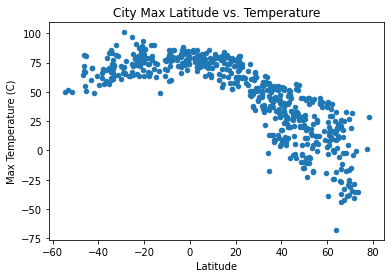

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

fig1 = city_data_df.plot.scatter(x='Lat', y='Max Temp')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

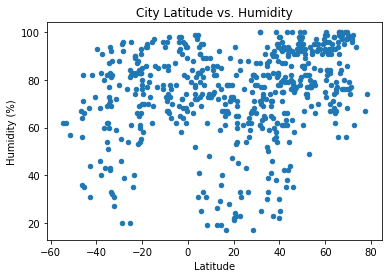

In [11]:
# Build the scatter plots for latitude vs. humidity
fig2 = city_data_df.plot.scatter(x='Lat', y='Humidity')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

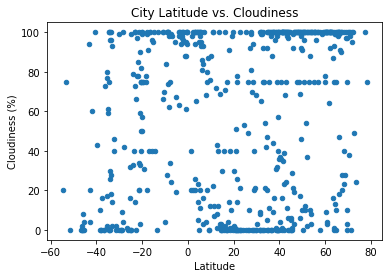

In [12]:
# Build the scatter plots for latitude vs. cloudiness
fig3 = city_data_df.plot.scatter(x='Lat', y='Cloudiness')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

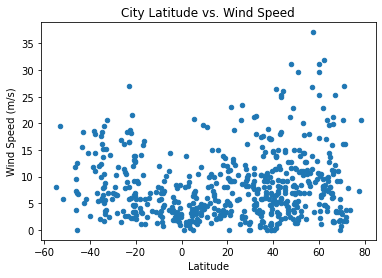

In [13]:
# Build the scatter plots for latitude vs. wind speed
fig4 = city_data_df.plot.scatter(x='Lat', y='Wind Speed')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
from sklearn.linear_model import LinearRegression

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
1,1,Puerto Colombia,10.9878,-74.9547,78.89,86,100,19.37,CO
6,6,Bairiki,1.3292,172.9752,86.00,70,40,8.05,KI
8,8,Pevek,69.7008,170.3133,-24.79,97,10,0.74,RU
9,9,Hobyo,5.3505,48.5268,76.41,79,98,20.78,SO
11,11,Kodiak,57.7900,-152.4072,36.91,93,0,3.44,US


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,0,Bluff,-46.6000,168.3333,64.29,67,0,11.79,NZ
2,2,Cidreira,-30.1811,-50.2056,72.37,78,99,5.79,BR
3,3,Isangel,-19.5500,169.2667,86.11,58,75,9.22,VU
4,4,Padang,-0.9492,100.3543,78.85,74,95,2.44,ID
5,5,Mataura,-46.1927,168.8643,81.46,36,0,3.83,NZ


###  Temperature vs. Latitude Linear Regression Plot

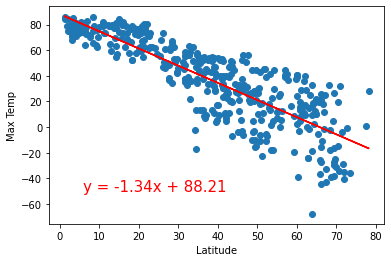

r-value = -0.84


In [34]:
# Linear regression on Northern Hemisphere

x_north = northern_hemi_df["Lat"]
y_north = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_north,y_north)
plt.plot(x_north,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(6,-50),fontsize=15,color="red")
plt.show()

print(f'r-value = {rvalue:.2f}')

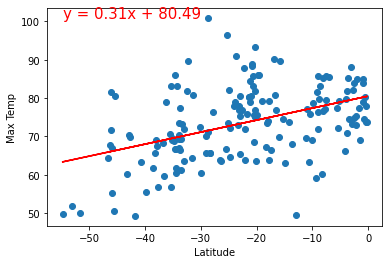

r-value = 0.44


In [41]:
# Linear regression on Southern Hemisphere
x_south = southern_hemi_df["Lat"]
y_south = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq_south = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_south,y_south)
plt.plot(x_south,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_south,(min(x_south),max(y_south)),fontsize=15,color="red", xycoords='data')
plt.show()

print(f'r-value = {rvalue:.2f}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE
- The temperature drops the further the latitude is from 0.

### Humidity vs. Latitude Linear Regression Plot

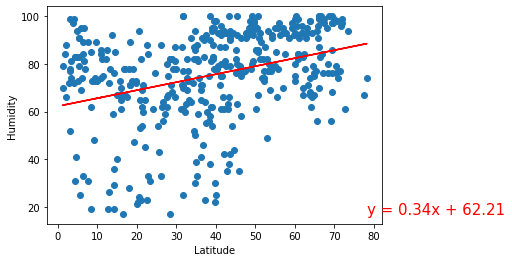

r-value = 0.34


In [44]:
# Northern Hemisphere
x_north2 = northern_hemi_df["Lat"]
y_north2 = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north2, y_north2)
regress_values = x_north2 * slope + intercept
line_eq_n2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_north2,y_north2)
plt.plot(x_north2,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_n2,(max(x_north2),min(y_north2)),fontsize=15,color="red", xycoords='data')
plt.show()

print(f'r-value = {rvalue:.2f}')

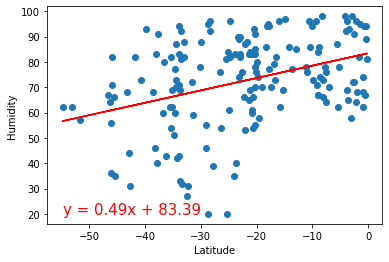

r-value = 0.37


In [45]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_south2 = southern_hemi_df["Lat"]
y_south2 = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south2, y_south2)
regress_values = x_south2 * slope + intercept
line_eq_s2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_south2,y_south2)
plt.plot(x_south2,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_s2,(min(x_south2),min(y_south2)),fontsize=15,color="red", xycoords='data')
plt.show()

print(f'r-value = {rvalue:.2f}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE
- The pattern seems to be the higher the latitude, the higher the humidity.

### Cloudiness vs. Latitude Linear Regression Plot

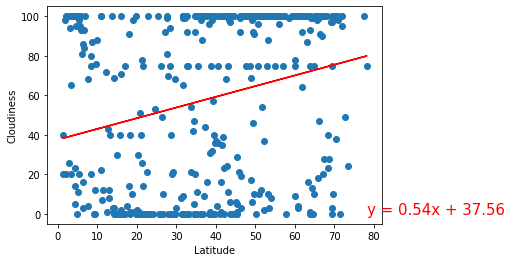

r-value = 0.25


In [53]:
# Northern Hemisphere
x_north3 = northern_hemi_df["Lat"]
y_north3 = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north3, y_north3)
regress_values = x_north3 * slope + intercept
line_eq_n3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_north3,y_north3)
plt.plot(x_north3,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_n3,(max(x_north3),min(y_north3)),fontsize=15,color="red", xycoords='data')
plt.show()

print(f'r-value = {rvalue:.2f}')

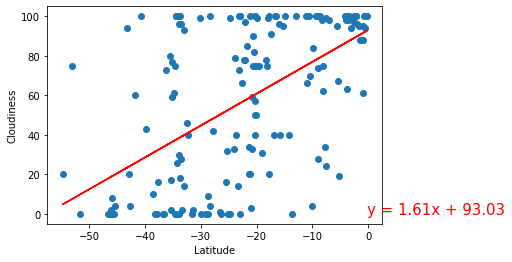

r-value = 0.55


In [50]:
# Southern Hemisphere
x_south3 = southern_hemi_df["Lat"]
y_south3 = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south3, y_south3)
regress_values = x_south3 * slope + intercept
line_eq_s3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_south3,y_south3)
plt.plot(x_south3,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_s3,(max(x_south3),min(y_south3)),fontsize=15,color="red", xycoords='data')
plt.show()

print(f'r-value = {rvalue:.2f}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE
- The larger the latitude, the cloudier it is.

### Wind Speed vs. Latitude Linear Regression Plot

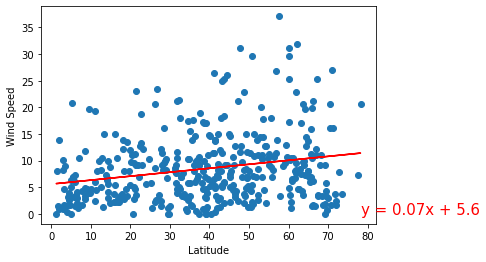

r-value = 0.23


In [49]:
# Northern Hemisphere
x_north4 = northern_hemi_df["Lat"]
y_north4 = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north4, y_north4)
regress_values = x_north4 * slope + intercept
line_eq_n4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_north4,y_north4)
plt.plot(x_north4,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_n4,(max(x_north4),min(y_north4)),fontsize=15,color="red", xycoords='data')
plt.show()

print(f'r-value = {rvalue:.2f}')

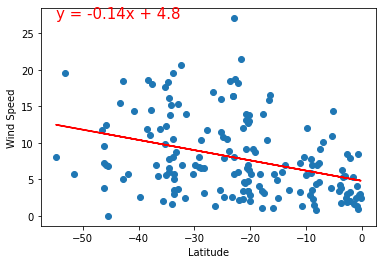

r-value = -0.35


In [52]:
# Southern Hemisphere
x_south4 = southern_hemi_df["Lat"]
y_south4 = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south4, y_south4)
regress_values = x_south4 * slope + intercept
line_eq_s4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_south4,y_south4)
plt.plot(x_south4,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_s4,(min(x_south4),max(y_south4)),fontsize=15,color="red", xycoords='data')
plt.show()

print(f'r-value = {rvalue:.2f}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE
- The further away the latitude gets from 0, the higher the wind speed. 